In [1]:
import yfinance as yf
import pandas as pd

# Download historical data for Nifty 50
nifty_50 = yf.download("^NSEI", start="2015-01-01", end="2024-04-01")

# Display the first few rows of the dataset
nifty_50.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800


In [2]:
# Check for missing values
print(nifty_50.isnull().sum())

# Fill missing values (if any) using ffill()
nifty_50.ffill(inplace=True)

# Normalize the data (if necessary)
# For now, we'll proceed without normalization

# Splitting the data
train_size = int(len(nifty_50) * 0.7)
validation_size = int(len(nifty_50) * 0.2)
test_size = len(nifty_50) - train_size - validation_size

train, validation, test = nifty_50[:train_size], nifty_50[train_size:train_size+validation_size], nifty_50[train_size+validation_size:]


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))


/Users/bhaveshtanan/Documents/SOC/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/bhaveshtanan/Documents/SOC/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/bhaveshtanan/Documents/SOC/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/bhaveshtanan/Documents/SOC/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Predicti

In [4]:
import yfinance as yf
import pandas as pd

# Download historical data for Nifty 50
nifty_50 = yf.download("^NSEI", start="2015-01-01", end="2023-06-01")

# Specify frequency during DataFrame creation
nifty_50 = nifty_50.asfreq('B')  # Assuming 'B' for business day frequency; adjust as per your data

# Fill missing values (if any)
nifty_50.ffill(inplace=True)

# Splitting the data
train_size = int(len(nifty_50) * 0.7)
validation_size = int(len(nifty_50) * 0.2)
test_size = len(nifty_50) - train_size - validation_size

train, validation, test = nifty_50[:train_size], nifty_50[train_size:train_size+validation_size], nifty_50[train_size+validation_size:]


[*********************100%%**********************]  1 of 1 completed


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))


In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14024D+00    |proj g|=  6.42911D-02


 This problem is unconstrained.



At iterate    5    f=  6.10946D+00    |proj g|=  1.62217D-02

At iterate   10    f=  6.10188D+00    |proj g|=  1.32010D-02

At iterate   15    f=  6.03233D+00    |proj g|=  1.53019D-02

At iterate   20    f=  6.02805D+00    |proj g|=  1.45768D-03

At iterate   25    f=  6.02775D+00    |proj g|=  6.40177D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   5.936D-06   6.028D+00
  F =   6.0277453840389414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define and fit the Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit = exp_smoothing_model.fit()

# Forecast
exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=len(test))


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
def evaluate_forecast(true_values, forecast_values):
    rmse = np.sqrt(mean_squared_error(true_values, forecast_values))
    mae = mean_absolute_error(true_values, forecast_values)
    return rmse, mae

# ARIMA evaluation
arima_rmse, arima_mae = evaluate_forecast(test['Close'], arima_forecast)

# SARIMA evaluation
sarima_rmse, sarima_mae = evaluate_forecast(test['Close'], sarima_forecast)

# Exponential Smoothing evaluation
exp_smoothing_rmse, exp_smoothing_mae = evaluate_forecast(test['Close'], exp_smoothing_forecast)

# Print evaluation results
print(f"ARIMA - RMSE: {arima_rmse}, MAE: {arima_mae}")
print(f"SARIMA - RMSE: {sarima_rmse}, MAE: {sarima_mae}")
print(f"Exponential Smoothing - RMSE: {exp_smoothing_rmse}, MAE: {exp_smoothing_mae}")


ARIMA - RMSE: 5050.524901555987, MAE: 5029.460457322886
SARIMA - RMSE: 4636.179990398226, MAE: 4613.399382377302
Exponential Smoothing - RMSE: 2503.6342340955484, MAE: 2235.4736353158814


Matplotlib is building the font cache; this may take a moment.


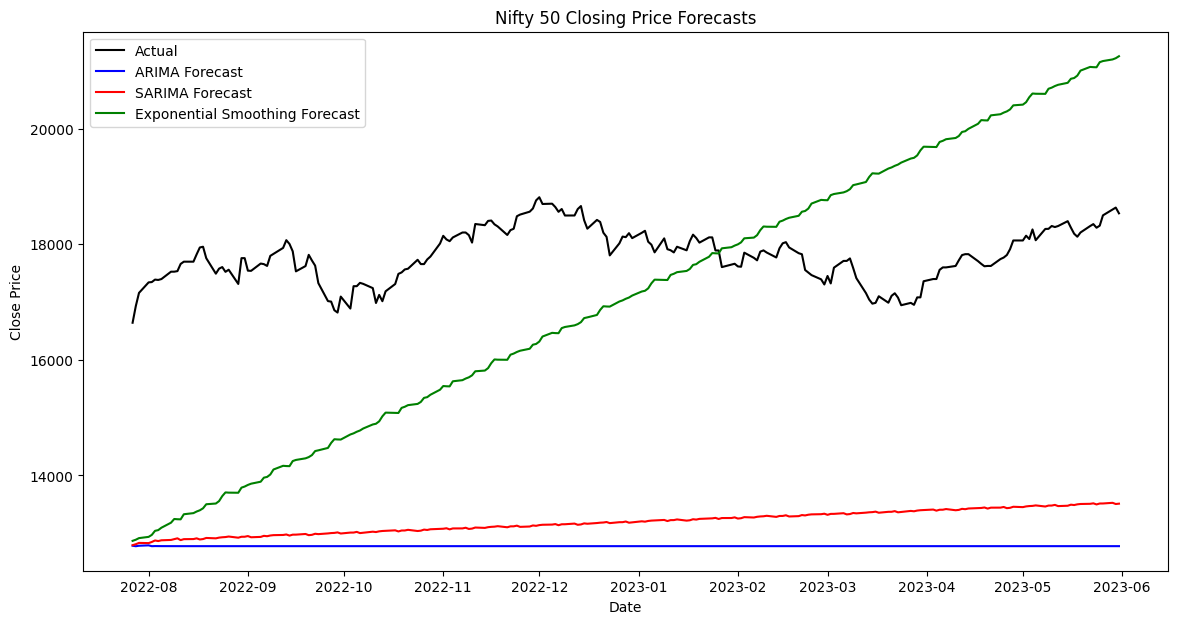

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(test.index, test['Close'], label='Actual', color='black')

# Plot ARIMA forecast
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')

# Plot SARIMA forecast
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')

# Plot Exponential Smoothing forecast
plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='green')

plt.title('Nifty 50 Closing Price Forecasts')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
